In [ ]:
#pip install torch

In [1]:
import torch
import numpy as np

# Generate values from 0 to 2pi, spaced by 0.1
X = torch.tensor(np.arange(0, 2 * np.pi, 0.1), dtype=torch.float32)
Y = torch.sin(X)

X[1], Y[1]

(tensor(0.1000), tensor(0.0998))

Neuron network
20 neurons in a single hidden layer. 10 neurons couldn't do it.

In [2]:
import torch.nn as nn
import torch.optim as optim

class SineNet(nn.Module):
    def __init__(self):
        super(SineNet, self).__init__()
        self.fc1 = nn.Linear(1, 20)  # Input layer to hidden layer with 10 units
        self.fc2 = nn.Linear(20, 1)  # Hidden layer to output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SineNet()

In [3]:
# Optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_function = nn.MSELoss()

# Reshape X and Y for training
X_train = X.view(-1, 1)
Y_train = Y.view(-1, 1)

X_train[1], Y_train[1]

(tensor([0.1000]), tensor([0.0998]))

In [4]:
# Training loop
epochs = 10000
for epoch in range(epochs):
    optimizer.zero_grad()   # Clear gradients for next train
    output = model(X_train)  # Forward pass
    loss = loss_function(output, Y_train)  # Calculate loss
    loss.backward()  # Backward pass
    optimizer.step()  # Update weights

    if epoch % 1000 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

Epoch 1/10000, Loss: 0.6906607151031494
Epoch 1001/10000, Loss: 0.004106092266738415
Epoch 2001/10000, Loss: 0.002903490327298641
Epoch 3001/10000, Loss: 0.0014751374255865812
Epoch 4001/10000, Loss: 0.0011438693618401885
Epoch 5001/10000, Loss: 0.0010942445369437337
Epoch 6001/10000, Loss: 0.0009045479819178581
Epoch 7001/10000, Loss: 0.0009031365625560284
Epoch 8001/10000, Loss: 0.0009051902452483773
Epoch 9001/10000, Loss: 0.0008330888813361526


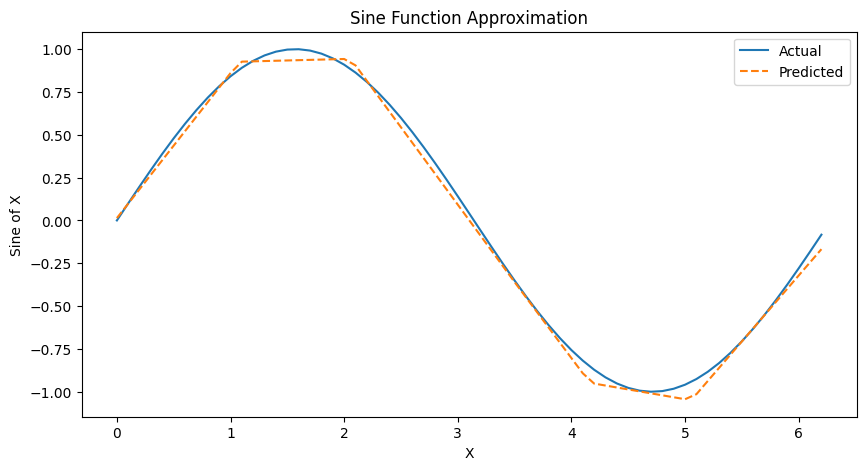

In [5]:
import matplotlib.pyplot as plt

# Predict values
with torch.no_grad():
    Y_pred = model(X_train)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(X.numpy(), Y.numpy(), label='Actual')
plt.plot(X.numpy(), Y_pred.numpy(), label='Predicted', linestyle='--')
plt.title('Sine Function Approximation')
plt.xlabel('X')
plt.ylabel('Sine of X')
plt.legend()
plt.show()